# Depression in Professionals Prediction

## Description
The aim of this project is to produce a model that predicts predict depression diagnosis in professionals.

The dataset, sourced from Kaggle, contains 2054 rows and 11 columns, with 10 independent variables and the target variable "Depression".

### Data Dictionary
|Variable|Description|
|-----|-----|
|Gender|Male/Female|
|Age|In years|
|Work Pressure|1 (low) to 5 (high)|
|Job Satisfaction|1 (low) to 5 (high)|
|Sleep Duration|Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours|
|Dietary Habits|Healthy, Moderate, Unhealthy|
|Have you ever had suicidal thoughts?|Yes/No|
|Work Hours|Work hours per day|
|Financial Stress|1 (low) to 5 (high)|
|Family History of Mental Illness|Yes/No|
|Depression|Yes/No|

## Import packages

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv


### Load Dataset

In [46]:
#load dataset
df = pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


## Data Exploration

In [95]:
df.shape

(2054, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [48]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [49]:
#rename columns to snakecase
df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Family History of Mental Illness': 'family_history'}, inplace=True)
for column in df.columns:
    df.rename(columns={column: column.lower().replace(' ', '_')}, inplace=True)
df.columns

Index(['gender', 'age', 'work_pressure', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'suicidal_thoughts', 'work_hours', 'financial_stress',
       'family_history', 'depression'],
      dtype='object')

In [50]:
#check for null values
df.isna().sum()

gender               0
age                  0
work_pressure        0
job_satisfaction     0
sleep_duration       0
dietary_habits       0
suicidal_thoughts    0
work_hours           0
financial_stress     0
family_history       0
depression           0
dtype: int64

In [51]:
df.describe(include='all')

,gender,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_hours,financial_stress,family_history,depression
count,2054,2054.000000,2054.000000,2054.000000,2054,2054,2054,2054.000000,2054.000000,2054,2054
unique,2,NaN,NaN,NaN,4,3,2,NaN,NaN,2,2
top,Male,NaN,NaN,NaN,7-8 hours,Unhealthy,No,NaN,NaN,No,No
freq,1066,NaN,NaN,NaN,530,713,1065,NaN,NaN,1046,1851
mean,NaN,42.171860,3.021908,3.015093,NaN,NaN,NaN,5.930867,2.978578,NaN,NaN
std,NaN,11.461202,1.417312,1.418432,NaN,NaN,NaN,3.773945,1.413362,NaN,NaN
min,NaN,18.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,35.000000,2.000000,2.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,43.000000,3.000000,3.000000,NaN,NaN,NaN,6.000000,3.000000,NaN,NaN
75%,NaN,51.750000,4.000000,4.000000,NaN,NaN,NaN,9.000000,4.000000,NaN,NaN


## Data Analysis

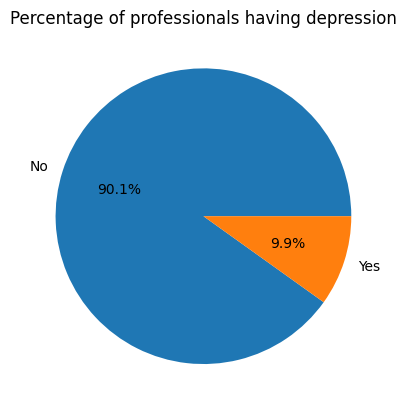

In [98]:
depression_count = df['depression'].value_counts()
plt.pie(x=depression_count, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Percentage of professionals having depression')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Family history of mental illness')

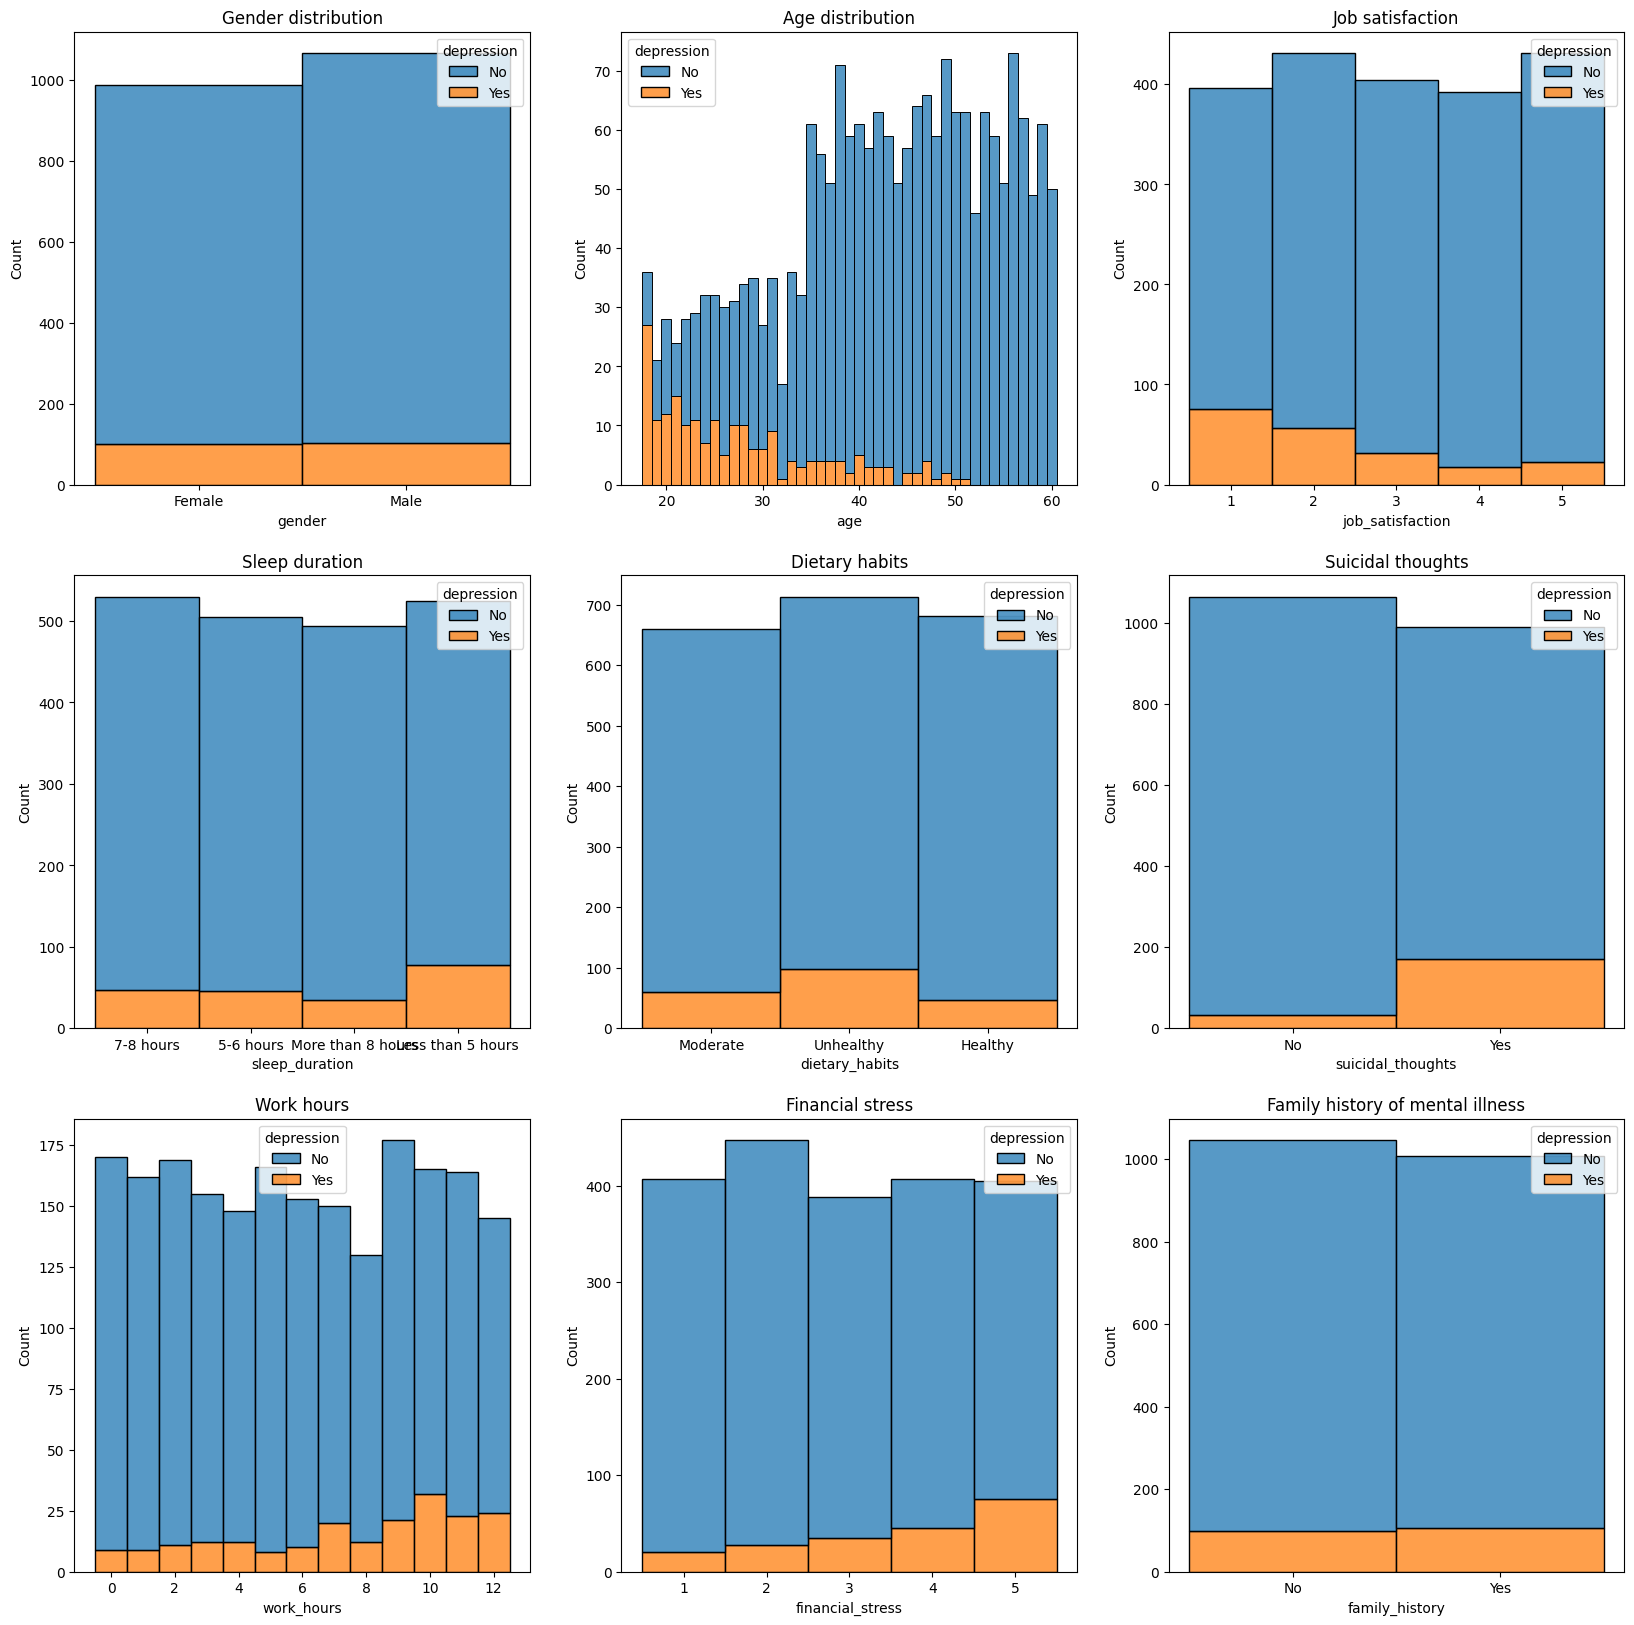

In [99]:
#plot distributions of independent variables
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

sns.histplot(data=df, x='gender', hue='depression', discrete=True, multiple='stack', ax=ax[0][0])
ax[0][0].set_title('Gender distribution')

sns.histplot(data=df, x='age', hue='depression', discrete=True, multiple='stack', ax=ax[0][1])
ax[0][1].set_title('Age distribution')

sns.histplot(data=df, x='job_satisfaction', hue='depression', discrete=True, multiple='stack', ax=ax[0][2])
ax[0][2].set_title('Job satisfaction')

sns.histplot(data=df, x='sleep_duration', hue='depression', discrete=True, multiple='stack', ax=ax[1][0])
ax[1][0].set_title('Sleep duration')

sns.histplot(data=df, x='dietary_habits', hue='depression', discrete=True, multiple='stack', ax=ax[1][1])
ax[1][1].set_title('Dietary habits')

sns.histplot(data=df, x='suicidal_thoughts', hue='depression', discrete=True, multiple='stack', ax=ax[1][2])
ax[1][2].set_title('Suicidal thoughts')

sns.histplot(data=df, x='work_hours', hue='depression', discrete=True, multiple='stack', ax=ax[2][0])
ax[2][0].set_title('Work hours')

sns.histplot(data=df, x='financial_stress', hue='depression', discrete=True, multiple='stack', ax=ax[2][1])
ax[2][1].set_title('Financial stress')

sns.histplot(data=df, x='family_history', hue='depression', discrete=True, multiple='stack', ax=ax[2][2])
ax[2][2].set_title('Family history of mental illness')

Depression is notably more prevalent in younger adults. Depression also seems to be correlated with lower job satisfaction, <5 hours of sleep, unhealthy diet, suicidal thoughts, longer work hours, and more financial stress.

In [54]:
#encode non-numerical columns
df_encoded = df.copy()
encoder = LabelEncoder()
columns = ['gender', 'suicidal_thoughts', 'family_history', 'depression']
for c in columns:
    encoder.fit(df_encoded[c].unique())
    df_encoded[c] = encoder.transform(df_encoded[c])
    print(encoder.classes_)

encoder.fit(df_encoded['sleep_duration'].unique())
encoder.classes_ = np.array(['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'])
df_encoded['sleep_duration'] = encoder.transform(df_encoded['sleep_duration'])
print(encoder.classes_)

encoder.fit(df_encoded['dietary_habits'].unique())
encoder.classes_ = np.array(['Unhealthy', 'Moderate', 'Healthy'])
df_encoded['dietary_habits'] = encoder.transform(df_encoded['dietary_habits'])
print(encoder.classes_)

df_encoded.head()

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Less than 5 hours' '5-6 hours' '7-8 hours' 'More than 8 hours']
['Unhealthy' 'Moderate' 'Healthy']


,gender,age,work_pressure,job_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_hours,financial_stress,family_history,depression
0,0,37,2.0,4.0,2,1,0,6,2,0,0
1,1,60,4.0,3.0,1,0,1,0,4,1,0
2,0,42,2.0,3.0,1,1,0,0,2,0,0
3,0,44,3.0,5.0,2,2,1,1,2,1,0
4,1,48,4.0,3.0,2,1,1,6,5,1,0


<Axes: >

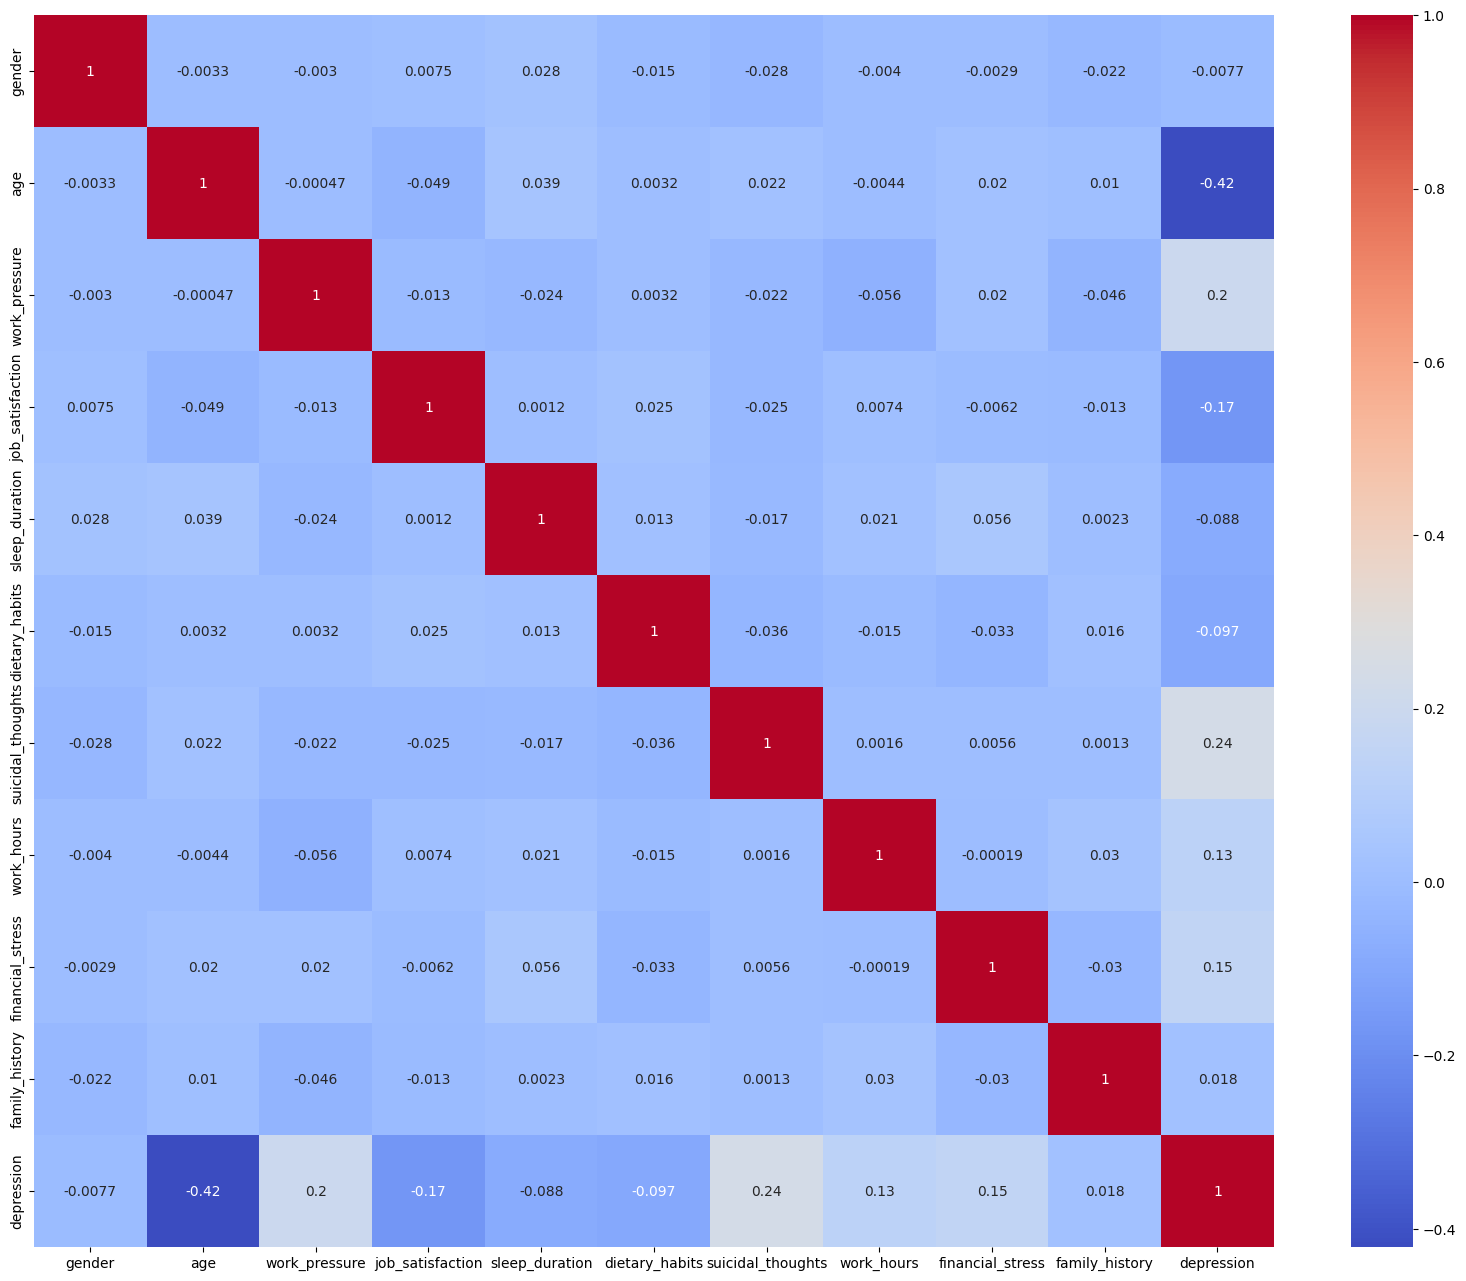

In [55]:
#plot heatmap of correlations
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

## Model Construction

In [56]:
#variable selection
X = df_encoded.drop(['depression'], axis=1)
y = df_encoded['depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 10) (617, 10) (1437,) (617,)


### Logistic Regression

In [57]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [58]:
y_pred_log = clf.predict(X_test)

In [59]:
#save logistic regression evaluation metrics
log_results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_log)],
    'Precision': [precision_score(y_test, y_pred_log)],
    'Recall': [recall_score(y_test, y_pred_log)],
    'F1': [f1_score(y_test, y_pred_log)],
    'Roc Auc': [roc_auc_score(y_test, y_pred_log)]
})
log_results

,Model,Accuracy,Precision,Recall,F1,Roc Auc
0,Logistic Regression,0.985413,0.948276,0.901639,0.92437,0.948122


### Decision Tree

In [60]:
#create decision tree with hyperparameter tuning
tree = DecisionTreeClassifier(random_state=42)
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_split': [2, 4, 6],
             'min_samples_leaf': [1, 3, 5]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='f1')

In [61]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.7 s, sys: 10.3 ms, total: 2.71 s
Wall time: 2.71 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='f1',
             scoring={'precision', 'recall', 'f1', 'roc_auc', 'accuracy'})

In [62]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [63]:
#use best parameters to train decision tree on entire training data sets
tree2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=2, random_state=42)
tree2.fit(X_train, y_train)
y_pred_tree = tree2.predict(X_test)

In [64]:
#save decision tree evaluation metrics
tree_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_tree)],
    'Precision': [precision_score(y_test, y_pred_tree)],
    'Recall': [recall_score(y_test, y_pred_tree)],
    'F1': [f1_score(y_test, y_pred_tree)],
    'Roc Auc': [roc_auc_score(y_test, y_pred_tree)]
})
tree_results

,Model,Accuracy,Precision,Recall,F1,Roc Auc
0,Decision Tree,0.923825,0.62963,0.557377,0.591304,0.760703


### Random Forest

In [65]:
#create random forest model with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 300],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [66]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 4min 23s, sys: 1.8 s, total: 4min 25s
Wall time: 4min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300]},
             refit='f1',
             scoring={'precision', 'recall', 'f1', 'roc_auc', 'accuracy'})

In [67]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [72]:
#use best parameters to train random forest model on entire training data sets
rf2 = RandomForestClassifier(max_depth=None, max_features=1.0,
                            max_samples=0.7, min_samples_leaf=1,
                            min_samples_split=4, n_estimators=300,
                            random_state=42)
rf2.fit(X_train, y_train)
y_pred_rf = rf2.predict(X_test)

In [73]:
#save random forest evaluation metrics
rf_results=pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_rf)],
    'F1': [f1_score(y_test, y_pred_rf)],
    'Roc Auc': [roc_auc_score(y_test, y_pred_rf)]
})
rf_results

,Model,Accuracy,Precision,Recall,F1,Roc Auc
0,Random Forest,0.961102,0.974359,0.622951,0.76,0.810576


## Model Evaluation

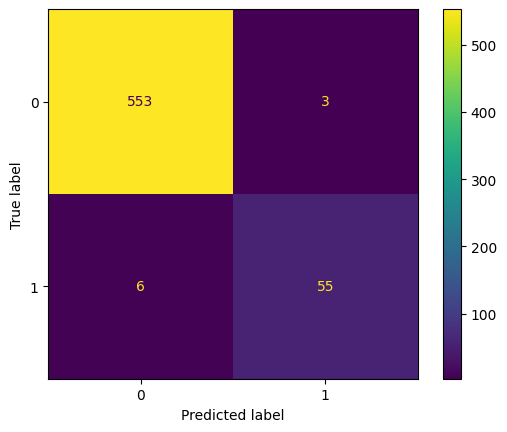

In [74]:
#plot confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred_log, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

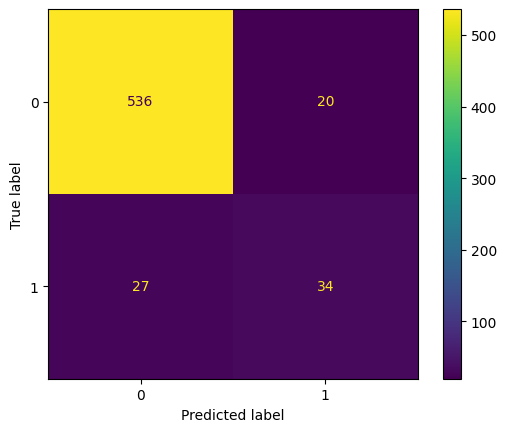

In [75]:
#plot confusion matrix for decision tree
cm = confusion_matrix(y_test, y_pred_tree, labels=tree2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree2.classes_)
disp.plot()

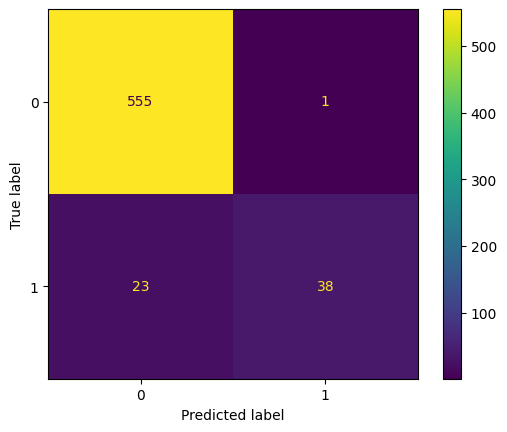

In [76]:
#plot confusion matrix for random forest
cm = confusion_matrix(y_test, y_pred_rf, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)
disp.plot()

### Evaluation Metrics

In [79]:
#create table of evaluation metrics
results = pd.concat([log_results, tree_results, rf_results], axis=0).reset_index(drop=True)
results

,Model,Accuracy,Precision,Recall,F1,Roc Auc
0,Logistic Regression,0.985413,0.948276,0.901639,0.924370,0.948122
1,Decision Tree,0.923825,0.629630,0.557377,0.591304,0.760703
2,Random Forest,0.961102,0.974359,0.622951,0.760000,0.810576


The logistic regression model performed signifcantly better than the decision tree and random forest classification models.

### Feature Importances

In [92]:
log_coefficients = pd.DataFrame({'features': clf.feature_names_in_, 'coefficients': clf.coef_[0]}, columns=['features', 'coefficients'])
log_coefficients = log_coefficients.sort_values(by='coefficients', ascending=False)
log_coefficients

,features,coefficients
6,suicidal_thoughts,5.746483
2,work_pressure,1.770121
8,financial_stress,1.478924
9,family_history,1.469418
7,work_hours,0.421758
0,gender,0.081375
1,age,-0.449858
4,sleep_duration,-0.969991
5,dietary_habits,-1.273480
3,job_satisfaction,-1.796136


Text(0.5, 0, 'Coefficient')

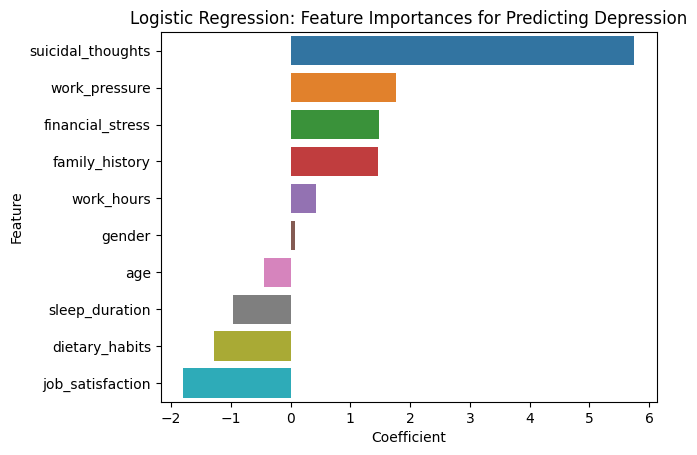

In [93]:
sns.barplot(data=log_coefficients, x='coefficients', y='features', orient='h')
plt.title("Logistic Regression: Feature Importances for Predicting Depression", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Coefficient")

The features with higher absolute value coefficients indicate a higher significance when predicting whether an individual has depression. Work pressure, job satisfaction, suicidal thoughts variables carry a larger magnitude and are most influential in the model.

## Conclusion

The logistic regression model performed the best in predicting whether an individual has depression. Out of all the variables, demographics play a lesser role than environmental and habitual factors i.e. suicidal thoughts, financial/job situation, self-care practices, and familial conditions. This information is useful in attempting to address some underlying causes of depression and how it might be mitigated by improving certain areas of one's life. It could also be used as a preemtive or educational measure by identifying people who might not have yet been diagnosed with depression for earlier intervention or urging individuals to be mindful of certain stressors in their lives.